# Quantum Machine Learning - Notebook

Author: [Nishantak Panigrahi](https://github.com/nishantak)

---

# Quantum Computing

### Qubit

A **qubit** is a vector in a 2-dimensional **Hilbert space**. Unlike classical bits, which can be either `0` or `1`, a qubit can exist in a superposition of these states.


### Hilbert Space

* A **complex vector space** (a vector space over the complex numbers ℂ).

* A **complete inner product space**. This means:

  * There is an inner product ⟨. , .⟩ defined on the space, s.t. for any vector $x \in H$:

    $$
    \| x \| = \sqrt{ \langle x, x \rangle }
    $$

  * The space is **complete** -> dist(x, y) = |x - y| -> there are no "holes" in the space, meaning that it contains the limits of all Cauchy sequences. If a sequence of vectors gets arbitrarily close together, its limit exists in the space.

For an **n-qubit system**, the Hilbert space is:

$$
H = \mathbb{C}^{2^n}
$$

### Qubit Representation | Dirac Notation

The **state** of a qubit can be written as:

$$
| \psi \rangle \in H
$$

where

$$
| \psi \rangle = 
\begin{bmatrix}
\alpha \\
\beta
\end{bmatrix}
$$

with probability amplitudes - $\alpha, \beta \in \mathbb{C}$ and $|\alpha|^2 + |\beta|^2 = 1$  (Born's Rule)

<br>

If the classical set of values that our system can take is, say, {`0`, `1`} - In quantum computing, these classical values correspond to **basis vectors** in $\mathbb{C}^2$:

$$
|0\rangle = 
\begin{bmatrix}
1 \\
0
\end{bmatrix},
\quad
|1\rangle = 
\begin{bmatrix}
0 \\
1
\end{bmatrix}
$$

These vectors form an **orthonormal basis** of $\mathbb{C}^2$, meaning:

$$
\quad \langle 0 | 1 \rangle = 0  ~~~~~~~~~~~~~~~~~~~  (ortho) \\

\langle 0 | 0 \rangle = 1, \quad \langle 1 | 1 \rangle = 1,   ~~~ (normal)
$$


Any qubit state $| \psi \rangle \in \mathbb{C}^2$ can be written as a **linear combination** of these basis vectors:

$$
| \psi \rangle = \alpha |0\rangle + \beta |1\rangle
$$

where:

$$
\alpha, \beta \in \mathbb{C}, \quad |\alpha|^2 + |\beta|^2 = 1
$$

Here:

* $\alpha$ and $\beta$ are complex numbers representing **probability amplitudes**.
* $|\alpha|^2$ is the probability of measuring the qubit in state $|0\rangle$.
* $|\beta|^2$ is the probability of measuring the qubit in state $|1\rangle$.

This is superposition -> qubit existing as both `0` and `1`, until measured.

### Measurement

> *Looking inside the box to see if the cat is alive or dead*

In quantum mechanics, **measurement** is like "opening the box" — the act of observing the system causes the qubit's superposition to **collapse** into one of the basis states.

If our qubit is in the state:

$$
| \psi \rangle = \alpha |0\rangle + \beta |1\rangle
$$

then measuring the qubit *in the $\{ |0\rangle, |1\rangle \}$ basis* results in:

* **Outcome 0** with probability $|\alpha|^2$
* **Outcome 1** with probability $|\beta|^2$

After the measurement, the state collapses to the corresponding basis vector:

$$
| \psi \rangle \to |0\rangle \quad \text{(if outcome 0)}
$$

$$
| \psi \rangle \to |1\rangle \quad \text{(if outcome 1)}
$$

### Entanglement

#### Product states (not entangled)

For an $n$-qubit system, a **basis state** looks like:

$$
|x\rangle = |x_1\rangle \otimes |x_2\rangle \otimes \cdots \otimes |x_n\rangle
$$

where

$$
x_i \in \{0, 1\} ~~~~~~~ (the~classical~set)
$$

These states **are not entangled** because they can be written as a **tensor product** of individual qubit states.

<br>

#### What is entanglement?

A quantum state is **entangled** if:

$$
| \psi \rangle \neq | \psi_1 \rangle \otimes | \psi_2 \rangle \otimes \cdots
$$

> That is, the state **cannot be factorized** into separate states for each qubit.

<br>

**Example: Bell state**

The Bell state:

$$
| \Phi^+ \rangle = \frac{1}{\sqrt{2}} ( |00\rangle + |11\rangle )
$$

This is **entangled** because there are no single-qubit states $| \psi_1 \rangle, | \psi_2 \rangle$ such that:

$$
| \Phi^+ \rangle = | \psi_1 \rangle \otimes | \psi_2 \rangle
$$

---

#### Hadamard and entanglement

The **Hadamard gate** ($H$) is a single-qubit quantum gate that creates superpositions.

All quantum gates are unitary matrices,

In matrix form (in the computational basis $\{|0\rangle, |1\rangle\}$):

$$
H = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
$$

**Unitary property**

A matrix $U$ is **unitary** if:

$$
U^\dagger U = U U^\dagger = I
$$

where $U^\dagger$ is the conjugate transpose (for $H$, since it’s real, just the transpose).


$$
H H^\dagger = H^\dagger H = H H = I
$$

<br>

The Hadamard gate acts as:

$$
H |0\rangle = \frac{1}{\sqrt{2}} ( |0\rangle + |1\rangle )
$$

$$
H |1\rangle = \frac{1}{\sqrt{2}} ( |0\rangle - |1\rangle )
$$

This creates superposition of equal probabilties, from a definite state

To create a Bell state:
1. Apply Hadamard on the first qubit:

$$
H |0\rangle = \frac{1}{\sqrt{2}}( |0\rangle + |1\rangle )
$$

2. Apply CNOT (control = qubit 1, target = qubit 2):

$$
\frac{1}{\sqrt{2}} ( |00\rangle + |11\rangle )
$$

Now we have entanglement: the two qubits' outcomes are correlated (beyond Local Hidden Variable)

<br>

**Measurement in Hadamard basis**

When we measure in the **Hadamard basis** (the $|+\rangle$, $|-\rangle$ basis):

$$
|+\rangle = \frac{1}{\sqrt{2}} ( |0\rangle + |1\rangle ),
\quad
|-\rangle = \frac{1}{\sqrt{2}} ( |0\rangle - |1\rangle )
$$

We’re asking:
*"Is the qubit in a state more like $|+\rangle$ or more like $|-\rangle$?"*

$$
P(+) = | \langle + | \psi \rangle |^2
$$

$$
P(-) = | \langle - | \psi \rangle |^2
$$

This lets us see quantum effects (like entanglement) **that are invisible in the standard computational basis** $\{ |0\rangle, |1\rangle \}$ (Hides the phase, coherence etc.)

<br>

Consider the **Bell state**:

$$
| \Phi^+ \rangle = \frac{1}{\sqrt{2}}( |00\rangle + |11\rangle )
$$

If we measure **qubit A** in the Hadamard basis:

* The outcome is **random** (we might get $|+\rangle$ or $|-\rangle$).

* But whatever we get, qubit B will be correlated **in the same Hadamard basis**

$$
|00\rangle = \frac{1}{2} \big( (|+\rangle + |-\rangle)(|+\rangle + |-\rangle) \big)
$$

$$
|11\rangle = \frac{1}{2} \big( (|+\rangle - |-\rangle)(|+\rangle - |-\rangle) \big)
$$

Add them up:

$$
| \Phi^+ \rangle = \frac{1}{\sqrt{2}} \left( |00\rangle + |11\rangle \right)
= \frac{1}{\sqrt{2}} \cdot \frac{1}{2}
\left(
(|+\rangle + |-\rangle)(|+\rangle + |-\rangle) + (|+\rangle - |-\rangle)(|+\rangle - |-\rangle)
\right)
$$

Simplify:

$$
= \frac{1}{\sqrt{2}} \cdot \frac{1}{2}
\left(
2 |+\rangle |+\rangle + 2 |-\rangle |-\rangle
\right)
= \frac{1}{\sqrt{2}} ( |+\rangle |+\rangle + |-\rangle |-\rangle )
$$

Meaning, 

* If we get $|+\rangle$, qubit B **collapses to $|+\rangle$**.
* If we get $|-\rangle$, qubit B **collapses to $|-\rangle$**.

The measurement outcomes are **perfectly correlated**, *even though we chose to measure in the Hadamard basis*.
This correlation **demonstrates entanglement** — their states are linked in *any basis* we choose.

# 1 Qubit Simulator

In [1]:
# import
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [2]:
# --- SETUP: 1-QUBIT DEVICE FOR SAMPLING ---
dev = qml.device("default.qubit", wires=1, shots=2048)

# --- DEFINE QUANTUM CIRCUIT ---
@qml.qnode(dev)
def hadamard_circuit():
    qml.Hadamard(wires=0)
    return qml.sample(qml.PauliZ(0))  # Measure in Z basis: +1 = |0>, -1 = |1>

Quantum circuit diagram:



(<Figure size 400x200 with 1 Axes>, <Axes: >)

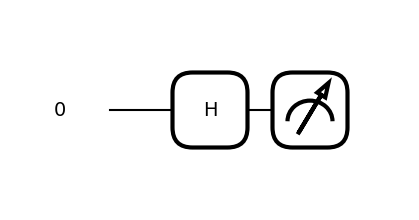

In [3]:
# print circuit
print("Quantum circuit diagram:\n")
qml.draw_mpl(hadamard_circuit)()

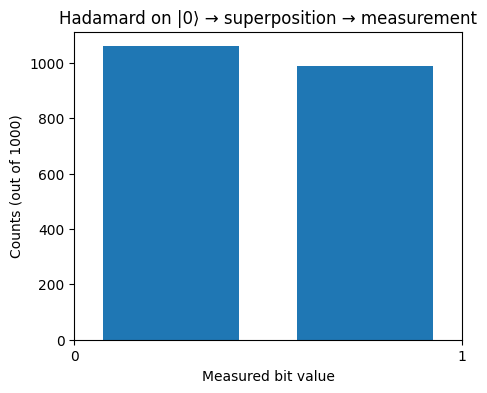

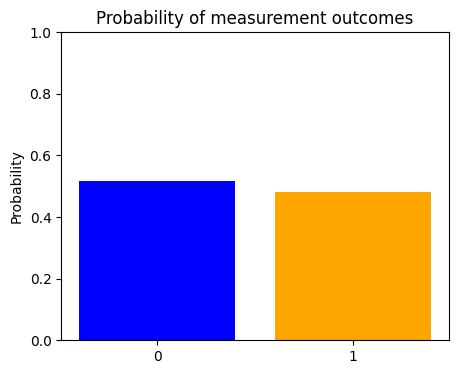

In [4]:
# run cicuit
samples = hadamard_circuit()
bit_samples = (samples == -1).astype(int)

# plot histogram of bit values

plt.figure(figsize=(5,4))
plt.hist(bit_samples, bins=2, rwidth=0.7)
plt.xticks([0,1])
plt.xlabel("Measured bit value")
plt.ylabel("Counts (out of 1000)")
plt.title("Hadamard on |0⟩ → superposition → measurement")
plt.show()

# plot probabilities of measurement outcomes
prob_0 = np.mean(bit_samples == 0)
prob_1 = np.mean(bit_samples == 1)
plt.figure(figsize=(5,4))
plt.bar(['0', '1'], [prob_0, prob_1], color=['blue', 'orange'])
plt.ylabel("Probability")
plt.title("Probability of measurement outcomes")
plt.ylim(0,1)
plt.show()

# Entanglement Simulation

Bell state circuit diagram:



(<Figure size 500x300 with 1 Axes>, <Axes: >)

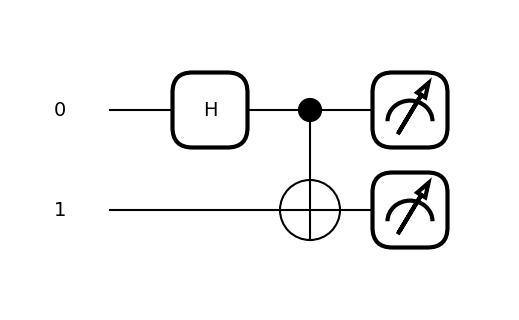

In [5]:
# --- Setup 2: BELL STATE FOR ENTANGLEMENT ---
dev2 = qml.device("default.qubit", wires=2, shots=1000)

@qml.qnode(dev2)
def bell_circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.sample(qml.PauliZ(0)), qml.sample(qml.PauliZ(1))

samples0, samples1 = bell_circuit()
bit0 = (samples0 == -1).astype(int)
bit1 = (samples1 == -1).astype(int)

# print circuit
print("Bell state circuit diagram:\n")
qml.draw_mpl(bell_circuit)()

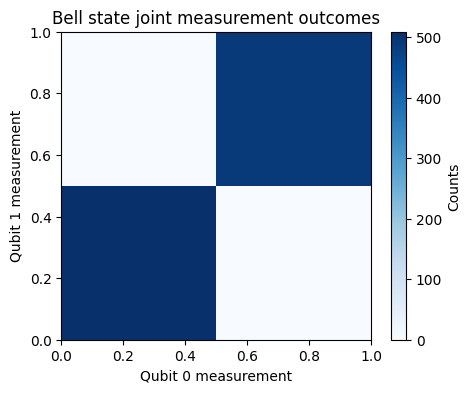

In [6]:
# 2D histogram of joint measurement outcomes
plt.figure(figsize=(5,4))
plt.hist2d(bit0, bit1, bins=[2,2], range=[[0,1],[0,1]], cmap='Blues')
plt.xlabel("Qubit 0 measurement")
plt.ylabel("Qubit 1 measurement")
plt.title("Bell state joint measurement outcomes")
plt.colorbar(label="Counts")
plt.show()

# Machine Learning

Goal: **Find patterns in data so we can make accurate predictions or decisions.**

Given a dataset:

$$
(x, y)
$$

the machine learns a function:

$$
f(x; \theta) \approx y
$$

where:

* $x$ = input features (e.g., size, number of rooms)
* $y$ = target (e.g., house price, class label)
* $\theta = \{w, b\}$ = model parameters (weights, biases)

### Decision making unit

```
Input Vector (x): features of raw data  
           |  
           v  
   +-------------------[+  
   | Weight Matrix (w)  |  
   |       *            |  
   |       x            |  
   |                    |  
   |       +            |  
   |  Bias Matrix (b)   |  
   +--------------------+  
           |  
           v  
   +--------------------+  
   |   Activation       |  
   |   Function (f)     |  
   +--------------------+  
           |  
           v  
        Output  
     y = f(w*x + b)  
```

### Training

* The model adjusts **$\theta = \{w, b\}$** using a loss function (penalty for how far prediction is from true) + optimization (e.g. gradient descent).
* The goal: minimize the difference between predicted $y$ and true $y$.
* The **activation function** $f$ lets us bend or curve the decision boundary:  $~w \cdot x + b$, so the model can fit complex data patterns amd bend decision boundaries

* This structure (input → weighted sum + bias → activation → output) is **one decision-making entity (a neuron)**.

**We can us these entities**:

* Stack them form larger models (neural networks), to learn hierarchical or more abstract patterns
* Switch activation functions -> make different kinds of models (linear, nonlinear, deep, regression, etc.)

### Two Circles Data

A synthetic dataset where points belong to **two concentric circles**:

$$
\text{CircleData}(x_1, x_2) =
\begin{cases}
1 & \text{if } (x_1, x_2) \text{ lies on outer circle} \\
0 & \text{if } (x_1, x_2) \text{ lies on inner circle}
\end{cases}
$$

Two circles defines a dataset where:

> Data points $(x_1, x_2)$ are sampled along two circles:
>
> * **Inner circle** -> class 0
> * **Outer circle** -> class 1

The class label $y$ depends on the distance from the origin: $~ r = \sqrt{x_1^2 + x_2^2}$

* If $r$ <= $r_{inner}$ → **inner circle** → $y = 0$
* If $r$ > $r_{inner}$ → **outer circle** → $y = 1$


**Visualizing in 2D space**

This setup forms **concentric circular patterns**, where linear classifiers fail because no straight line can separate the two classes globally.

If we plot the data:

* Points near the origin -> **inner circle -> class 0**
* Points further out -> **outer circle -> class 1**

The positive and negative classes form a **ring-shaped pattern**:

**Why does linear fail on two circles?**

A **linear model** tries to find a straight line (hyperplane) that separates classes:

$$
w_1 x_1 + w_2 x_2 + b = 0
$$

But if we look at the circles plot:

* No **single straight line** can separate inner circle (0) from outer circle (1)
* The classes are nested -> we’d need a **curved line boundary**

<br>

So, We

* **Add a `hidden` layer:** A fancy term for linear combination of multiple neurons to combine linear parts so we have a complex decision boundary instead of just 1 line.

* Each neuron **learns a part of the solution**; each layer combines output of previous layer to **learn heirarchial patterns.**

* **Apply a non-linear activation (e.g., tanh, relu)** -> This lets the model **curve, bend, or combine linear parts (neurons)**

**Structure of Two Circles Neural Network**

The neural network $N_\theta$ is constructed with:

* an input layer (receiving input vector $x = (x_1, x_2)$)
* one or more hidden layers (e.g. with 2 or more neurons)
* non-linear activation functions (e.g. $\tanh$ or ReLU)
* a linear output layer that yields the prediction $\hat{y}$

<br>
We have,

$$
N_\theta~(x1, x2) = f\big( W^{L} * f\big( W^{L−1} * f( ... f( W^{1} * (x1, x2) + b^{1} ) ... ) + b^{L−1} \big) + b^{L} \big)
$$

where:

* $L-1$ is the number of hidden layers

* Hidden Layers, $h^{i} = f(W^{i} \cdot h^{i−1} + b^{i})$: for each neuron in layer $i$; $W$ and $b$ are weight matrix and bias vector respectively

* $f$: non-linear activation (e.g. $\tanh$, ReLU)


Essentially, for two circles:
* First hidden neuron: learns one part of the circular split

* Second hidden neuron: learns another part

* Output combines those -> correct classes


In [7]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns


Schematic for a simple MLP with 2 input neurons, 2 hidden layers with 5 neurons each, and 1 output neuron

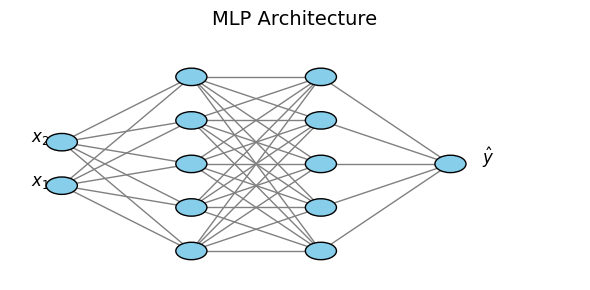

In [8]:
def draw_mlp_architecture(input_size=2, hidden_sizes=[5, 5], output_size=1):
    layer_sizes = [input_size] + hidden_sizes + [output_size]
    layer_count = len(layer_sizes)

    fig, ax = plt.subplots(figsize=(6, 3))
    ax.axis('off')
    ax.set_title("MLP Architecture", fontsize=14)

    v_spacing = 1.5
    h_spacing = 2.5

    positions = {}

    for i, layer_size in enumerate(layer_sizes):
        layer_x = i * h_spacing
        top_y = (max(layer_sizes) - layer_size) * v_spacing / 2
        for j in range(layer_size):
            neuron_y = j * v_spacing + top_y
            circle = plt.Circle((layer_x, neuron_y), 0.3, color='skyblue', ec='k', zorder=4)
            ax.add_patch(circle)
            positions[(i, j)] = (layer_x, neuron_y)

            # Add labels
            if i == 0:
                ax.text(layer_x - 0.6, neuron_y, f"$x_{{{j+1}}}$", fontsize=12)
            elif i == layer_count - 1:
                ax.text(layer_x + 0.6, neuron_y, "$\\hat{y}$", fontsize=12)

    # Draw connections
    for i in range(layer_count - 1):
        for j in range(layer_sizes[i]):
            for k in range(layer_sizes[i+1]):
                x1, y1 = positions[(i, j)]
                x2, y2 = positions[(i+1, k)]
                ax.plot([x1, x2], [y1, y2], 'gray', linewidth=1, zorder=1)

    ax.set_xlim(-1, layer_count * h_spacing)
    ax.set_ylim(-1, max(layer_sizes) * v_spacing)
    plt.tight_layout()
    plt.show()

draw_mlp_architecture(input_size=2, hidden_sizes=[5, 5], output_size=1)

In [9]:
# --- HELPER: Plot decision boundaries ---
def plot_decision_boundary(clf, X, y, title, factor=0.5):
    # Grid
    xx, yy = np.meshgrid(
        np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 500),
        np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 500)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Get probabilities or decision function
    if hasattr(clf, "predict_proba"):
        probs = clf.predict_proba(grid)[:,1].reshape(xx.shape)
    else:
        probs = clf.decision_function(grid).reshape(xx.shape)
    
    # Plot contour
    plt.figure(figsize=(6,6))
    plt.contourf(xx, yy, probs, levels=25, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

    # Overlay true circles
    circle1 = plt.Circle((0,0), factor, color='black', fill=False, linestyle='--', linewidth=2)
    circle2 = plt.Circle((0,0), 2*factor, color='black', fill=False, linestyle='--', linewidth=2)
    plt.gca().add_patch(circle1)
    plt.gca().add_patch(circle2)

    plt.title(title)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.axis("equal")
    plt.show()

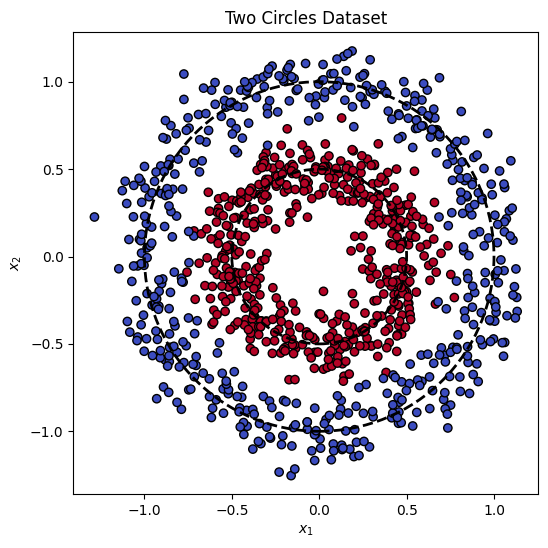

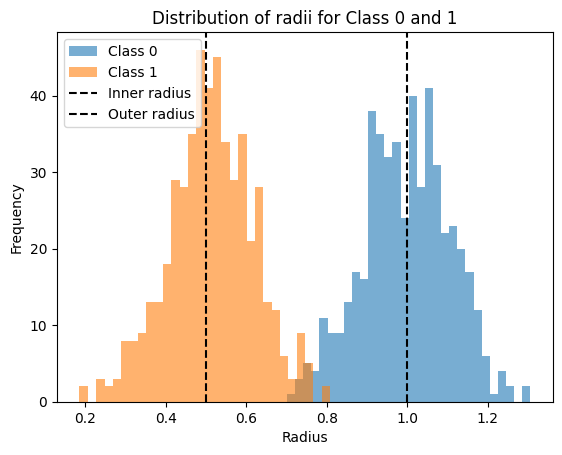

In [10]:
# --- Generate two circles dataset ---
X, y = make_circles(n_samples=1000, noise=0.11, factor=0.5, random_state=42)

# Plot dataset
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
circle1 = plt.Circle((0,0), 0.5, color='black', fill=False, linestyle='--', linewidth=2)
circle2 = plt.Circle((0,0), 1.0, color='black', fill=False, linestyle='--', linewidth=2)
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.title("Two Circles Dataset")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.axis("equal")
plt.show()

radii = np.linalg.norm(X, axis=1)
plt.hist(radii[y==0], bins=30, alpha=0.6, label='Class 0')
plt.hist(radii[y==1], bins=30, alpha=0.6, label='Class 1')
plt.axvline(0.5, color='black', linestyle='--', label='Inner radius')
plt.axvline(1.0, color='black', linestyle='--', label='Outer radius')
plt.xlabel("Radius")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of radii for Class 0 and 1")
plt.show()


In [11]:
# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression Test Accuracy: 0.460


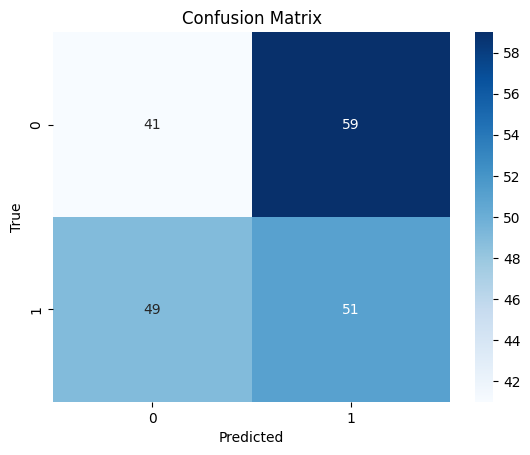

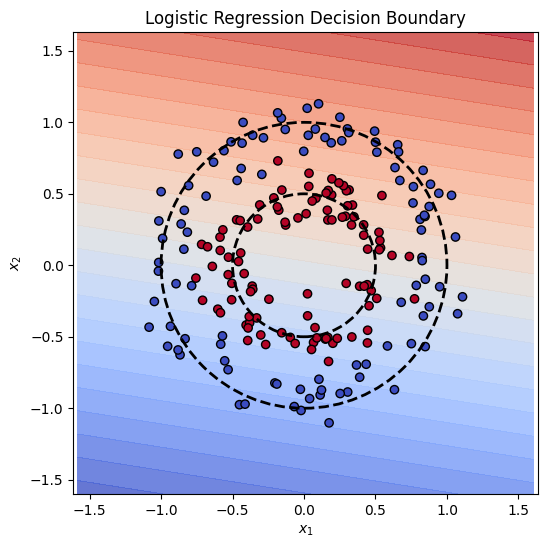

In [12]:
# --- Linear model: Logistic regression --- y = sigmoid(wx + b) || FAILS
lin_clf = LogisticRegression()
lin_clf.fit(X_train, y_train)

# --- Evaluation & Accuracy ---
lin_preds = lin_clf.predict(X_test)
lin_acc = accuracy_score(y_test, lin_preds)
print(f"Logistic Regression Test Accuracy: {lin_acc:.3f}")

# --- Confusion matrix [ [true negatives, false positives], [false negatives, true positives] ] ---
cm = confusion_matrix(y_test, lin_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plot linear
plot_decision_boundary(lin_clf, X_test, y_test, "Logistic Regression Decision Boundary", factor=0.5)

^ Pretty much like random guessing

Neural Network Test Accuracy: 0.950


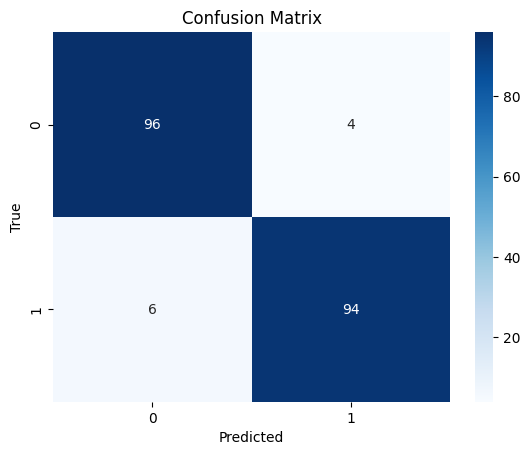

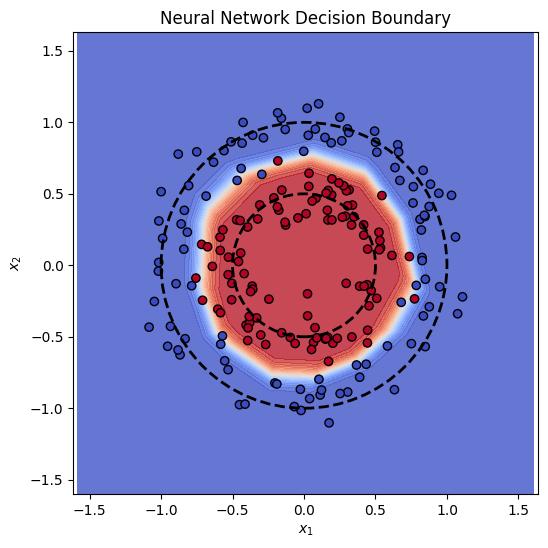

In [13]:
# --- Define and train neural network: Multi-Layer Perceptron (MLP) --- || WORKS
mlp_clf = MLPClassifier(hidden_layer_sizes=(10,10), activation='relu', max_iter=512, random_state=42)
mlp_clf.fit(X_train, y_train)

# --- Evaluation & Accuracy ---
mlp_preds = mlp_clf.predict(X_test)
mlp_acc = accuracy_score(y_test, mlp_preds)
print(f"Neural Network Test Accuracy: {mlp_acc:.3f}")

# --- Confusion matrix ---
cm = confusion_matrix(y_test, mlp_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# --- Plot decision boundary ---
plot_decision_boundary(mlp_clf, X_test, y_test, "Neural Network Decision Boundary", factor=0.5)

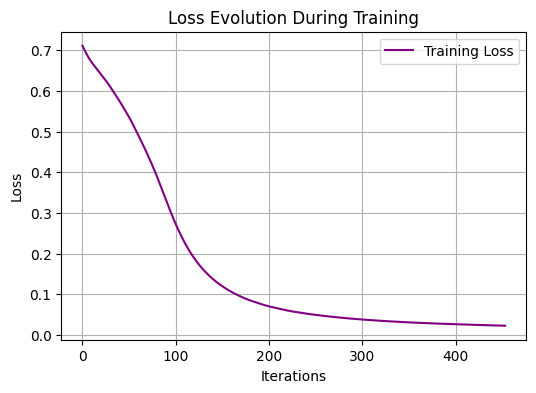

In [14]:
# Plot training loss over epochs
plt.figure(figsize=(6,4))
plt.plot(mlp_clf.loss_curve_, label="Training Loss", color='purple')
plt.title("Loss Evolution During Training")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

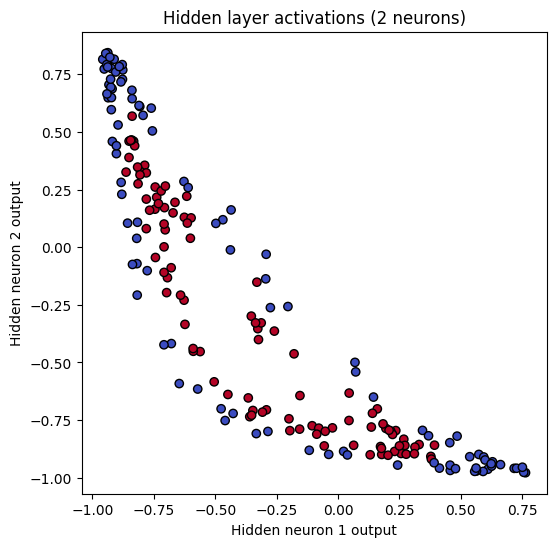

In [15]:
# --- Visualize hidden layer activations ---
hidden_layer_weights = mlp_clf.coefs_[0]
hidden_layer_biases = mlp_clf.intercepts_[0]
activations = np.tanh(X_test@hidden_layer_weights + hidden_layer_biases)

plt.figure(figsize=(6,6))
plt.scatter(activations[:,0], activations[:,1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Hidden layer activations (2 neurons)")
plt.xlabel("Hidden neuron 1 output")
plt.ylabel("Hidden neuron 2 output")
plt.show()

# Quantum Machine Learning

| Type                                         | What It Does                                                              |Use                                                                                  |
| -------------------------------------------- | --------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------- |
| **1. Variational Quantum Classifiers (VQC)** | Learns patterns using trainable quantum circuits.                | Classificaiton or regression|
| **2. Quantum Kernel Methods**                | Maps data to a high-dimensional quantum space where it's easier to separate classes.          | Use a quantum SVM to classify cancer types from gene data (e.g., breast cancer vs. benign).  |
| **3. Quantum k-NN**                          | Finds closest training examples using quantum distance calculation.                           | Recommender system: find similar users/products using quantum-enhanced distance.             |
| **4. Quantum PCA / Clustering**              | Finds directions of most variance or groups in data using quantum algorithms.                 | Dimensionality reduction of financial data, or quantum k-means to group customers.           |
| **5. Quantum Boltzmann Machines**            | Learns data distributions using quantum-enhanced probability/energy models.                          | Generate images of digits (quantum MNIST-style generation).                                  |
| **6. QAOA for ML**                           | Solves optimization problems (like clustering) using a special quantum algorithm called QAOA. | Cluster cities into delivery zones by minimizing cost/distance.                              |
| **7. Quantum Reinforcement Learning**        | Uses quantum policy/value networks to learn actions in an environment.                        | A robot learning to move in a maze using quantum state processing.                           |


## Hybrid Quantum-Classical Neural Network (QCNN)

### Classical Neural Network (NN)
- Performs part of the computation, like feature extraction.

- Operates in conventional vector space (ℝⁿ), using tools like ReLU, tanh, dense layers, etc.

### Parameterized Quantum Circuit (PQC) to encode data
- A variational quantum circuit with trainable gates (RX, RY, RZ, etc.)

- Takes classical features, encodes them into quantum states, processes them via rotaion, entangling gates, and measures the output.

- Outputs scalar or multi-qubit expectation values for classification.

| Classical                        | Quantum                                                   |
| -------------------------------- | --------------------------------------------------------- |
| Efficient on CPUs/GPUs           | Leverages quantum parallelism                             |
| Good for learning local patterns | Can represent **non-local correlations** via entanglement |
| Large scale (millions of params) | Small scale (few qubits), but **expressive** -> capture more complex relations             |

<br>

**Motivation:**
Quantum circuits can represent certain functions more efficiently (with fewer parameters or depth) than classical models — in theory — especially those involving:
- Encode and entangle multiple features in superposition

- Simultaneously represent multiple basis states -> richer function space

- Generalize complex decision boundaries more efficiently using linear number of gates (in theory)


For example:
- In small datasets with complex topology (like circles), quantum models may offer better inductive bias -> prior assumption (function space) that data has complex correlations

- Some functions require exponential classical resources to approximate, but linear depth quantum circuits can represent them

### Working

Input: $x = [x_1, x_2]$

#### 1. Classical preprocessing:

```math
h = \tanh(W \cdot x + b)
```

Now we have a new feature vector `h` (say 3 numbers), which we pass to quantum.


#### 2. Quantum encoding:

We send `h` into a quantum circuit by rotating qubits -> write data into quantum states, like in a `Bloch Sphere`:

$$
|ψ(x)⟩ = RX(h_1) \cdot RX(h_2) \cdot RX(h_3) \cdot |000⟩
$$ 

Where, |000⟩ is starting state `0, 0, 0` of the three qubits

This makes a quantum state that **represents your data**. These are like neural network weights -> the angles of rotations are learned during training.


#### 3. Quantum processing:

Apply quantum gates:

* **Rotation gates**: RX, RY, RZ (with trainable angles) || This is like applying a weight to a neuron

* **Entangling gates**: like CNOT -> Represent more complex relationships || This is like combining many neurons

This is a "quantum layer" that gives the final quantum state based on trainable parameters:

$$
|\psi(x, \theta)⟩ = U(\theta) |\psi(x)⟩
$$

Where U is a trainable unitary operation, and $\theta$ is a trainable parameter

#### 4. Measurement:

At the end, we **measure** a qubit (or more), in Z basis -> more like |0> or |1> ?:

$$
\hat{y} = \langle Z_0 \rangle = ⟨\psi| Z ⊗ I ⊗ I |\psi⟩
$$

> This is measuring the first qubit and not the other two.

This gives a number between `-1` and `1`. We **rescale** it to \[0, 1] to predict class.

### Benefit?

* The **quantum circuit acts like a complex non-linear layer**.
* It can model patterns **classical networks may need more layers** for.
* In theory, some functions may be **easier** to learn quantumly.

> On current noisy quantum hardware (NISQ era), this advantage is not guaranteed and depends on the problem and encoding.

In [33]:
# imports
import pennylane as qml
from pennylane import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# --- Generate dataset ---
X, y = make_circles(n_samples=1000, noise=0.11, factor=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We have to chose angle embedding, rotation and entanglement according to:
- our data's structre and its underlying behaviour/nature

- required expressivity 

- correlation complexity

In [35]:
# -- Define quantum circuit --
n_qubits = 2
dev = qml.device("lightning.qubit", wires=n_qubits)

@qml.qnode(dev)
def quantum_circuit(inputs, weights):
    # Encode classical input using angle embedding
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))
    
    # for i in range(n_qubits): qml.Hadamard(wires=i) # UPDATE: What if I put hadamard here also? --> Expressivity?? 
    # UPDATE: Don't, with hybrid model. 
    # Hadamard in Hybrid model -> feature extractor; hadamard apparently scrambles info -> bad clssical post processing

    # Variational layer: entangle and rotate
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    
    # Measure in Z basis
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

In [36]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# -- Define hybrid model --
n_layers = 3 # Number of variational layers
weight_shapes = {"weights": (n_layers, n_qubits, 3)}  # 3 -> number of rotation parameters per wire

# 3 * 2 * 3 = 18 trainable parameters
qlayer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes) # Quantum layer -> trainable PyTorch layer

class HybridQNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.cl_in = nn.Linear(2, 2)         # Classic -> Quantum | CUrrently linear to observe effects of the quantum layer more clearly
        self.q_layer = qlayer                # Quantum Layer
        self.cl_out = nn.Linear(2, 2)        # Quantum -> Output
        # self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.cl_in(x)
        x = self.q_layer(x)
        x = self.cl_out(x)
        # x = self.sigmoid(x)
        return x

In [37]:
# Convert data to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.long)

X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch  = torch.tensor(y_test,  dtype=torch.long)

Epoch 1 - Loss: 0.67435
Epoch 8 - Loss: 0.33503
Epoch 16 - Loss: 0.13115
Epoch 24 - Loss: 0.08652
Epoch 32 - Loss: 0.07043


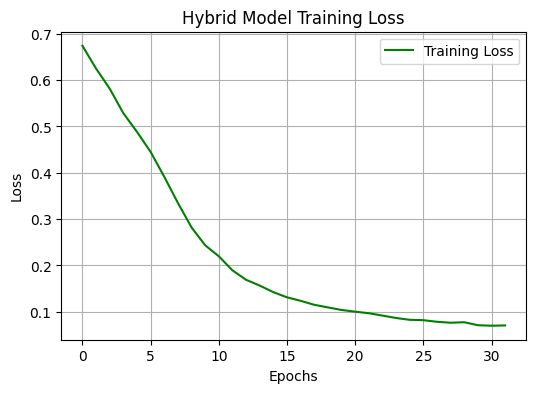

In [38]:
# Create data loader
train_loader = DataLoader(TensorDataset(X_train_torch, y_train_torch), batch_size=64, shuffle=True)

# Initialize model
model = HybridQNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

# Training loop
train_losses = []
for epoch in range(32):
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = loss_fn(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    if not epoch or not (epoch+1)%8: print(f"Epoch {epoch+1} - Loss: {avg_loss:.5f}")

# Plot loss
plt.figure(figsize=(6,4))
plt.plot(train_losses, label="Training Loss", color='green')
plt.title("Hybrid Model Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

Hybrid QML Test Accuracy: 0.965


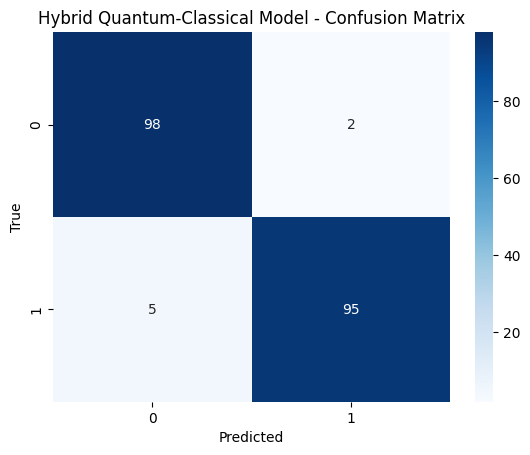

In [39]:
model.eval()
with torch.no_grad():
    preds = model(X_test_torch)
    preds_cls = preds.argmax(dim=1).flatten()

acc = accuracy_score(y_test, preds_cls)
print(f"Hybrid QML Test Accuracy: {acc:.3f}")

# Confusion matrix
cm = confusion_matrix(y_test, preds_cls)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Hybrid Quantum-Classical Model - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

96.5 > 95 ?? 

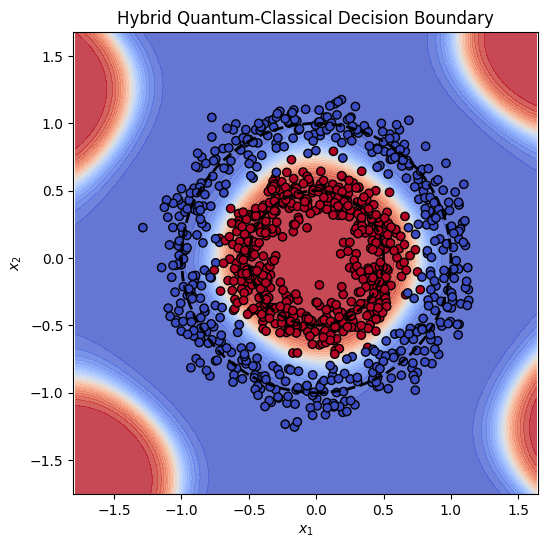

In [40]:
import torch.nn.functional as F
def plot_decision_boundary_hybrid(model, X, y, title):
    xx, yy = np.meshgrid(
        np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 128),
        np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 128)
    )
    grid = np.c_[xx.ravel(), yy.ravel()] 
    grid_std = scaler.transform(grid)
    grid_tensor = torch.tensor(grid_std, dtype=torch.float32)

    with torch.no_grad():
        logits = model(grid_tensor)               
        probs = F.softmax(logits, dim=1)[:, 1].numpy().reshape(xx.shape)

    plt.figure(figsize=(6,6))
    plt.contourf(xx, yy, probs, levels=25, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

    circle1 = plt.Circle((0,0), 0.5, color='black', fill=False, linestyle='--', linewidth=2)
    circle2 = plt.Circle((0,0), 1.0, color='black', fill=False, linestyle='--', linewidth=2)
    plt.gca().add_patch(circle1)
    plt.gca().add_patch(circle2)

    plt.title(title)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.axis("equal")
    plt.show()

plot_decision_boundary_hybrid(model, X, y, "Hybrid Quantum-Classical Decision Boundary")

The above behaviour - the red decision plots on farther sides are because of: 
- the model's inductive bias -> prior assumption that there are complicated / non-local correlations, due to the quantum layer. Since no data lies there the model has not trained that area and does not generalise well since there are not much complicated correlations in the data set. 

- Rotational gates induce periodicity so, the values beyond the model's range can wrap around and seem like this in euclidiean space but may still be close in quantum (Hilbert) space

(<Figure size 1900x300 with 1 Axes>, <Axes: >)

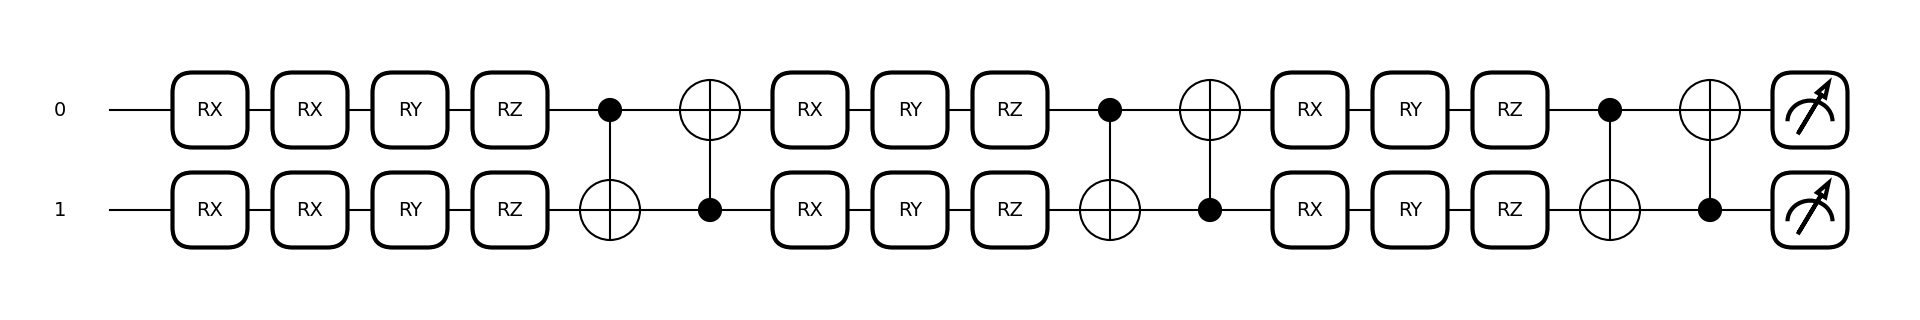

In [41]:
# internal quantum circuit
@qml.qnode(dev)
def quantum_circuit(inputs, weights):
    # Angle embedding (same as AngleEmbedding with 'X' by default)
    for i in range(n_qubits):
        qml.RX(inputs[i], wires=i)
    
    # Entanglement same as StronglyEntanglingLayers
    for layer in weights:
        # Apply rotations
        for i in range(n_qubits):
            qml.RX(layer[i][0], wires=i)
            qml.RY(layer[i][1], wires=i)
            qml.RZ(layer[i][2], wires=i)

        # Apply CNOT entangling in a ring pattern
        for i in range(n_qubits):
            qml.CNOT(wires=[i, (i+1) % n_qubits])

    # Measurement in Z basis
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

qml.draw_mpl(quantum_circuit)([0.1, 0.2], np.random.rand(n_layers, n_qubits, 3))

## Variational Quantum Classifier

This is just the Parametrized Circuit of the Hybrid-Classical System, shown right above this heading. No classical layers. However, the training loop is still classical - So, in a way this is still a hybrid model

Requirements for full-Quantum Learning

| Requirement                          | Description                                                                                                                       |
| ------------------------------------ | --------------------------------------------------------------------------------------------------------------------------------- |
| **Quantum Data**                   | Data stored and accessed in quantum RAM (qRAM), not classical memory.                                                             |
| **Quantum Loss Function**          | A loss function that can be encoded and minimized entirely within a quantum circuit (e.g., as an energy expectation).             |
| **Quantum Gradient Descent**       | Algorithms like **Quantum Natural Gradient**, **QDD** (quantum dynamical descent), or **QSGD** for parameter updates.             |
| **Trainable Parameters as Qubits** | Use qubit registers to represent weights (a fully unitary model with quantum weights).                                            |
| **Quantum Labels**                 | If labels are quantum (e.g., quantum states), you could compare output with label inside a quantum circuit (e.g., fidelity loss). Used in Quantum {AutoEncoders, GAN, Error Correction} |


In [25]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [26]:
# --- Generate dataset ---
X, y = make_circles(n_samples=1000, noise=0.11, factor=0.5, random_state=42)
y = y*2 - 1  # Convert labels from {0,1} to {-1,+1}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard scaling instead of L2 normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(<Figure size 500x300 with 1 Axes>, <Axes: >)

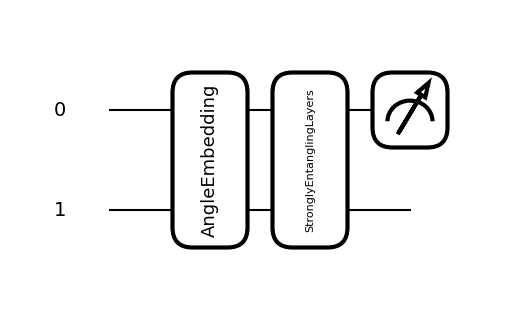

In [27]:
n_qubits = 2
n_layers = 2
dev = qml.device("lightning.qubit", wires=n_qubits)

# --- Quantum circuit with batched input ---
@qml.qnode(dev)
def quantum_node(x, weights):
    qml.templates.AngleEmbedding(x, wires=range(n_qubits)) # classical -> quantum map
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits)) # Expressivity, non-local correlations by entanglement
    return qml.expval(qml.PauliZ(0))

qml.draw_mpl(quantum_node)([0.1, 0.2], np.random.rand(n_layers, n_qubits, 3))

In [28]:
# Vectorized prediction
def predict(X, weights):
    return quantum_node(X, weights)

# Loss function: Mean Squared Error
def square_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

Epoch 1: Loss = 1.2112
Epoch 8: Loss = 1.1391
Epoch 16: Loss = 1.0758
Epoch 24: Loss = 1.0308
Epoch 32: Loss = 0.9993
Epoch 40: Loss = 0.9752
Epoch 48: Loss = 0.9521
Epoch 56: Loss = 0.9251
Epoch 64: Loss = 0.8921
Epoch 72: Loss = 0.8549
Epoch 80: Loss = 0.8167
Epoch 88: Loss = 0.7797
Epoch 96: Loss = 0.7440
Epoch 104: Loss = 0.7099
Epoch 112: Loss = 0.6782
Epoch 120: Loss = 0.6502
Epoch 128: Loss = 0.6267


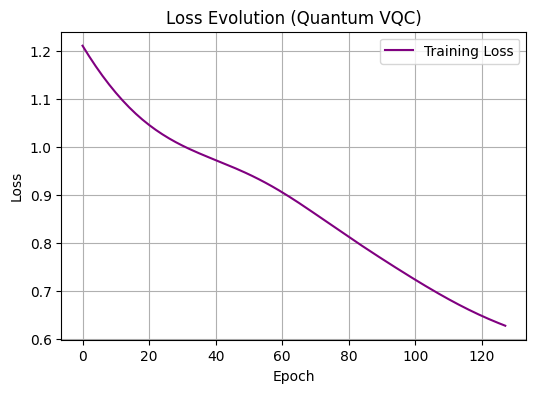

In [29]:
# --- Training loop ---
def train(X, y, epochs=128, lr=0.01):
    weights = np.random.uniform(0, 2*np.pi, size=(n_layers, n_qubits, 3))
    opt = qml.AdamOptimizer(stepsize=lr)
    losses = []
    for epoch in range(epochs):
        weights, loss = opt.step_and_cost(lambda w: square_loss(y, predict(X, w)), weights)
        losses.append(loss)
        if not epoch or not (epoch+1)% 8: print(f"Epoch {epoch+1}: Loss = {loss:.4f}")
    return weights, losses

trained_weights, loss_history = train(X_train, y_train)

# --- Plot loss curve ---
plt.figure(figsize=(6, 4))
plt.plot(loss_history, label="Training Loss", color="purple")
plt.title("Loss Evolution (Quantum VQC)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

VQC Test Accuracy: 0.655


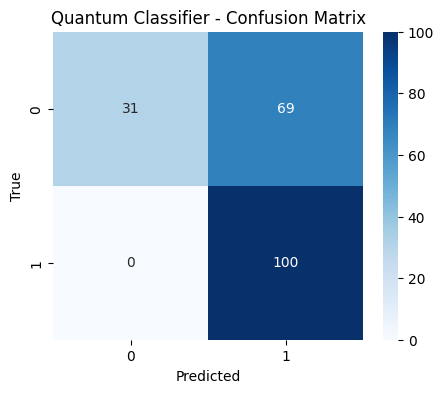

In [30]:
y_pred = predict(X_test, trained_weights)

# Convert outputs to binary classes
y_test_binary = (y_test + 1) // 2
y_pred_binary = (np.sign(y_pred) + 1) // 2

# Accuracy & confusion matrix
acc = accuracy_score(y_test_binary, y_pred_binary)
print(f"VQC Test Accuracy: {acc:.3f}")

cm = confusion_matrix(y_test_binary, y_pred_binary, labels=[0, 1])
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Quantum Classifier - Confusion Matrix")
plt.show()

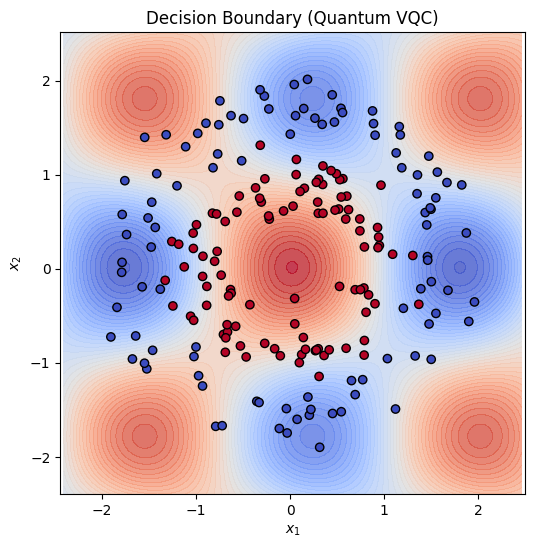

In [31]:
# --- Plot decision boundary ---
def plot_decision_boundary_vqc(weights, X, y, title):
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 128),
        np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 128)
    )
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid_points)
    Z = predict(grid_scaled, weights).reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, levels=50, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=(y+1) // 2, cmap=plt.cm.coolwarm, edgecolors="k")
    plt.title(title)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.axis("equal")
    plt.show()

plot_decision_boundary_vqc(trained_weights, X_test, y_test, "Decision Boundary (Quantum VQC)")

Optionally, we can treat it as Torch / TensorFlow layer for faster training on classical hardware (Simulation)

Also, tried hadamard superposition to see if we get better results

Epoch 1: Loss = 0.6747
Epoch 8: Loss = 0.5561
Epoch 16: Loss = 0.5542
Epoch 24: Loss = 0.5530
Epoch 32: Loss = 0.5526
Epoch 40: Loss = 0.5538
Epoch 48: Loss = 0.5529
Epoch 56: Loss = 0.5540
Epoch 64: Loss = 0.5529


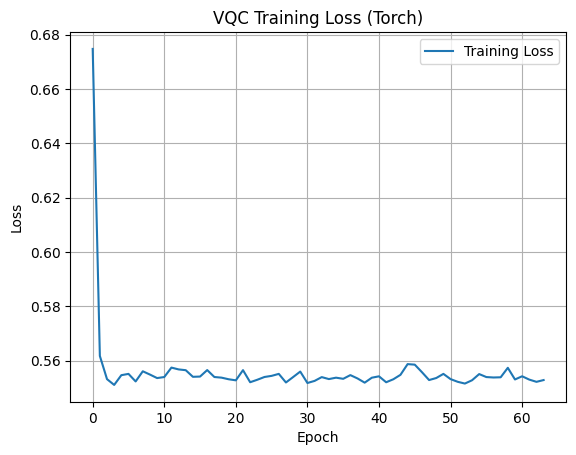

Test Accuracy: 0.700


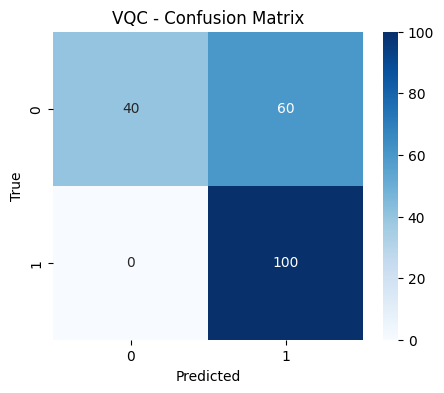

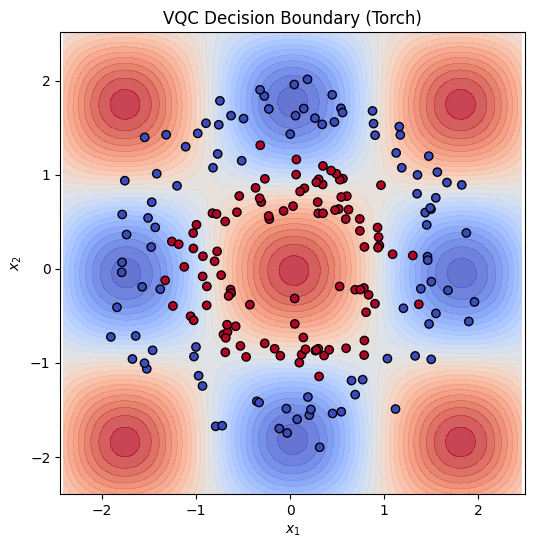

(<Figure size 600x300 with 1 Axes>, <Axes: >)

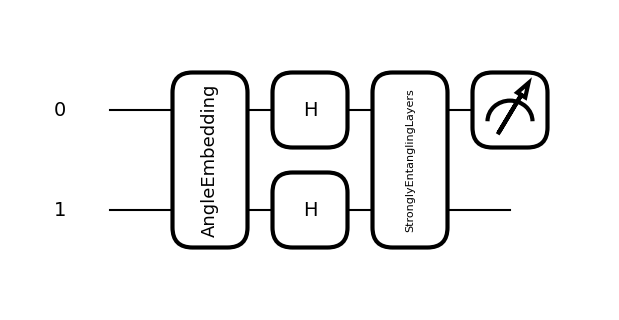

In [ ]:
import pennylane as qml
from pennylane import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Generate dataset ---
X, y = make_circles(n_samples=1000, noise=0.11, factor=0.5, random_state=42)
y = y*2 - 1  # Convert labels from {0,1} to {-1,+1}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to torch tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=16, shuffle=True)

# --- Quantum circuit setup ---
n_qubits = 2
n_layers = 4
dev = qml.device("lightning.qubit", wires=n_qubits)

@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    # No hadamard here: Features maps should start from |0000..> to encode classical data into clean interpretable embeddings
    # hadamard here would make all classical data symmetric in hilbert space
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits)) 
    for i in range(n_qubits): qml.Hadamard(wires=i) # hadamard here
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    # No hadamard here: destroys expressivity and meaningful entanglement
    return qml.expval(qml.PauliZ(0))

# --- Torch layer wrapping the quantum circuit ---
class VQCLayer(nn.Module):
    def __init__(self):
        super().__init__()
        weight_shapes = {"weights": (n_layers, n_qubits, 3)}
        self.q_layer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)

    def forward(self, x):
        return self.q_layer(x)

# --- Full model ---
class VQCClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.vqc = VQCLayer()

    def forward(self, x):
        return self.vqc(x)

model = VQCClassifier()

# --- Training ---
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss() 
losses = []
n_epochs = 64
for epoch in range(n_epochs):
    batch_losses = []
    for xb, yb in train_loader:
        pred = model(xb)
        loss = loss_fn(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_losses.append(loss.item())
    mean_loss = np.mean(batch_losses)
    losses.append(mean_loss)
    if not epoch or not (epoch+1) %8:
        print(f"Epoch {epoch+1}: Loss = {mean_loss:.4f}")

# --- Plot loss ---
plt.plot(losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("VQC Training Loss (Torch)")
plt.grid(True)
plt.legend()
plt.show()

# --- Evaluation ---
with torch.no_grad():
    y_pred = model(X_test_t).squeeze().numpy()

y_pred_labels = ((np.sign(y_pred) + 1) // 2).astype(int)
y_true_labels = ((y_test + 1) // 2).astype(int)

acc = accuracy_score(y_true_labels, y_pred_labels)
print(f"Test Accuracy: {acc:.3f}")

# --- Confusion matrix ---
cm = confusion_matrix(y_true_labels, y_pred_labels, labels=[0, 1])
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("VQC - Confusion Matrix")
plt.show()

# --- Decision boundary ---
def plot_decision_boundary(model, X, Y, title):
    xx, yy = np.meshgrid(
        np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 128),
        np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 128)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)

    with torch.no_grad():
        preds = model(torch.tensor(grid_scaled, dtype=torch.float32)).numpy().reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, preds, levels=25, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, edgecolors='k')

    plt.title(title)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.axis("equal")
    plt.show()

plot_decision_boundary(model, X_test, y_test, "VQC Decision Boundary (Torch)")
qml.draw_mpl(quantum_circuit)([0.1, 0.2], np.random.rand(n_layers, n_qubits, 3))

Hadamard in PQC did reduce loss in MUCH early epochs; raised accuracy 65.6% -> 70%

Low accuracy and this effect is due to the pure quanutm nature of the circuit not being like the nature of the dataset. Since no classical layers the quantum effect is just amplified